# Car Image Classification

This notebook demonstrates how to load a car image dataset, preprocess the images, train a convolutional neural network (CNN) to classify the images, and evaluate the model's performance.

## Step 1: Import Libraries

First, we need to import the necessary libraries.


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

## Step 2: Define the Dataset Path

We define the path to the dataset. Ensure that you update the `dataset_path` variable to the location of your unzipped dataset.


In [3]:
dataset_path = 'Cars Dataset'


## Step 3: Load and Explore Data

We load the images and their corresponding labels from the dataset. The images are resized to a fixed size (128x128) for uniformity.


In [4]:
def load_data(dataset_path):
    images = []
    labels = []
    for label in os.listdir(dataset_path):
        if label == 'train':
            sub_path = os.path.join(dataset_path, label)
            for car_label in os.listdir(sub_path):
                car_path = os.path.join(sub_path, car_label)
                for img_file in os.listdir(car_path):
                    img_path = os.path.join(car_path, img_file)
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.resize(img, (128, 128))  # Resize to a fixed size
                            images.append(img)
                            labels.append(car_label)
                        else:
                            print(f"Warning: Image {img_path} could not be loaded.")
                    except Exception as e:
                        print(f"Error loading image {img_path}: {str(e)}")
    return np.array(images), np.array(labels)

images, labels = load_data(dataset_path)
print(f"Loaded {len(images)} images with labels.")


Loaded 3352 images with labels.


## Step 4: Preprocess Data

We encode the labels into numerical values and one-hot encode them for training. We also normalize the image pixel values to the range [0, 1].


In [6]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_onehot = to_categorical(labels_encoded)

# Normalize images
images = images / 255.0

## Step 5: Train/Test Split

We split the data into training and testing sets.


In [7]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels_onehot, test_size=0.2, random_state=42)

## Step 6: Build and Train the Model

We define a convolutional neural network (CNN) model and train it on the training data.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

c:\Users\Ashmi jha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 26s 277ms/step - accuracy: 0.2499 - loss: 1.9822 - val_accuracy: 0.3651 - val_loss: 1.7514
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 25s 293ms/step - accuracy: 0.3781 - loss: 1.7009 - val_accuracy: 0.4173 - val_loss: 1.5765
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - accuracy: 0.4917 - loss: 1.4187 - val_accuracy: 0.5231 - val_loss: 1.3617
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 24s 281ms/step - accuracy: 0.6057 - loss: 1.1248 - val_accuracy: 0.5768 - val_loss: 1.2519
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 23s 279ms/step - accuracy: 0.7354 - loss: 0.7755 - val_accuracy: 0.6185 - val_loss: 1.2556
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 24s 284ms/step - accuracy: 0.8232 - loss: 0.5339 - val_accuracy: 0.6170 - val_loss: 1.3132
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 24s 282ms/step - accuracy: 0.8952 - loss: 0.3397 - val_accuracy: 0.6572 - val_loss: 1.3511
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 23s 278ms/step - accuracy: 0.9451 - loss: 0.1810 - val_accu

## Step 7: Evaluate the Model

We evaluate the model on the test data and plot the training history.


21/21 - 1s - 55ms/step - accuracy: 0.6706 - loss: 2.0087
Test accuracy: 0.6706408262252808


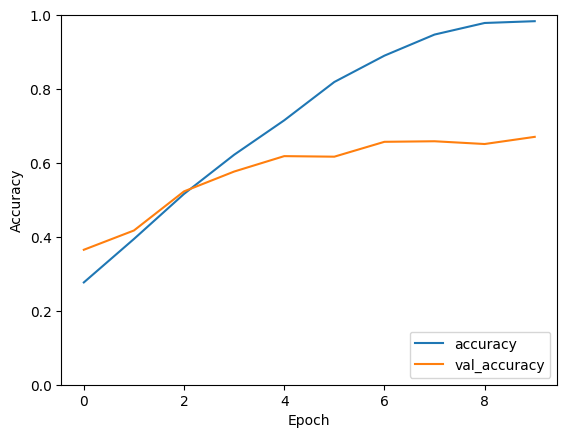

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")